In [44]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("diabetes.csv")

In [28]:
df = df.drop(["Insulin","SkinThickness"],axis=1)

In [29]:
df[["Glucose","BloodPressure","BMI"]] = df[["Glucose","BloodPressure","BMI"]].replace(0,np.nan)

In [30]:
df.isnull().sum()

Pregnancies                  0
Glucose                      5
BloodPressure               35
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   BMI                       757 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    int64  
 6   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 42.1 KB


In [32]:
df["Glucose"] = df["Glucose"].fillna(df["Glucose"].median())
df["BloodPressure"] = df["BloodPressure"].fillna(df["BloodPressure"].mean())
df["BMI"] = df["BMI"].fillna(df["BMI"].mean())

In [33]:
log_clf = LogisticRegression(max_iter=200)
rf_clf = RandomForestClassifier(random_state=42)
knn_clf = KNeighborsClassifier()

In [35]:
voting_clf = VotingClassifier(
    estimators = [
        ("lr",log_clf),
        ("rf",rf_clf),
        ("knn",knn_clf)
    ],
    voting = 'soft'
)

In [37]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=42)

In [38]:
voting = voting_clf.fit(X_train,y_train)

In [41]:
y_pred = voting_clf.predict(X_test)

In [42]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7619047619047619
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       151
           1       0.66      0.64      0.65        80

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



In [43]:
for clf in (log_clf, rf_clf, knn_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, "Accuracy:", accuracy_score(y_test, y_pred))

LogisticRegression Accuracy: 0.7402597402597403
RandomForestClassifier Accuracy: 0.7619047619047619
KNeighborsClassifier Accuracy: 0.7445887445887446
VotingClassifier Accuracy: 0.7619047619047619


In [45]:
y_proba = voting_clf.predict_proba(X_test)[:, 1]

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

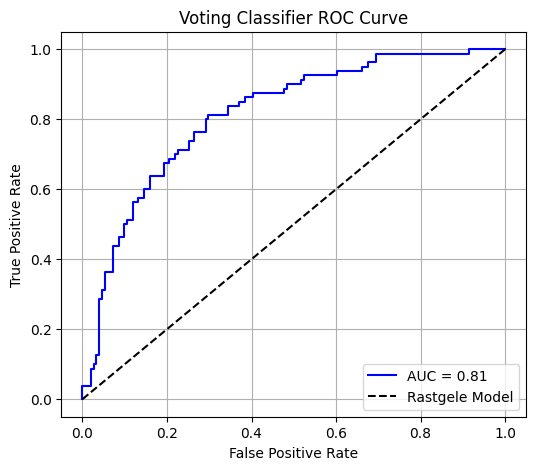

In [47]:
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Rastgele Model")  # 45 derece çizgi
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Voting Classifier ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()